#**Maestría en Inteligencia Artificial Aplicada**

##**TC5044.10 Operaciones de aprendizaje automático**

###Tecnológico de Monterrey

###Dr. Gerardo Rodríguez Hernández

## **Fase 1_Equipo23**

## **Equipo # 23**

## **Nombre y matrícula:**

* Hansel Zapiain Rodriguez A00469031
* Víctor Daniel Bohórquez Toribio A01794554
* Ruben Guerrero del Fierro A01793005
* Omar Mexia Barraza A01794780
* Luis Axel González Hernández A01795321

# **Análisis Exploratorio de Datos**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from scipy.stats import boxcox

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.base import clone
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [5]:
df = pd.read_csv("../data/raw/data.csv", sep=';')
print(df.shape)
print(df.head(5))

(4424, 37)
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2              

In [15]:
# Tipos de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [16]:
percentage_lost = (df.isnull().sum() / len(df)) * 100
percentage_lost

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance\t                      0.0
Previous qualification                            0.0
Previous qualification (grade)                    0.0
Nacionality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Admission grade                                   0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder          

In [20]:
# Análisis de Distribución
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application mode,4424.0,NaN,NaN,NaN,18.669078,17.484682,1.0,1.0,17.0,39.0,57.0
Application order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,8856.642631,2063.566416,33.0,9085.0,9238.0,9556.0,9991.0
Daytime/evening attendance\t,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous qualification,4424.0,NaN,NaN,NaN,4.577758,10.216592,1.0,1.0,1.0,1.0,43.0
Previous qualification (grade),4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nacionality,4424.0,NaN,NaN,NaN,1.873192,6.914514,1.0,1.0,1.0,1.0,109.0
Mother's qualification,4424.0,NaN,NaN,NaN,19.561935,15.603186,1.0,2.0,19.0,37.0,44.0
Father's qualification,4424.0,NaN,NaN,NaN,22.275316,15.343108,1.0,3.0,19.0,37.0,44.0


In [21]:
#Columnas con números enteros
enteros = list(df.select_dtypes(include=['int64']).columns)
print("Total de variables con números enteros: ",len(enteros))
print(enteros)
#Columnas con números flotantes
flotantes = list(df.select_dtypes(include=['float64']).columns)
print("Total de variables con números flotantes: ",len(flotantes))
print(flotantes)

#Columnas binarias
df_binarias = pd.DataFrame(df.select_dtypes([object]).nunique()==2,columns=['Cantidad'])
print("Total de variables binarias: ",len(df_binarias.loc[(df_binarias.Cantidad != False)]))
print(df_binarias.loc[(df_binarias.Cantidad != False)])

#Columnas con valores categóricos

categoricos = list(df.select_dtypes(include=['object']).columns)
print("Total de variables categoricas: ",len(categoricos))
print(categoricos)
print("Niveles de variables categoricas: \n",df.select_dtypes([object]).nunique())

print('\n')
print("DESCRIPCION POR TIPO DE VARIABLE")
if enteros:
  print('Descripción de variables enteras:')
  print(df[enteros].describe().T)
else:
  print('Descripción de variables enteras:')
  print('No hay valores enteros')
print('\n')
if flotantes:
  print('Descripción de variables flotantes:')
  print(df[flotantes].describe().T)
else:
  print('Descripción de variables flotantes:')
  print('No hay valores flotantes')
print('\n')
if categoricos:
  print('Descripción de variables Categóricas:')
  print(df[categoricos].describe(include=['object']).T)
else:
  print('Descripción de variables Categóricas:')
  print('No hay variables categóricas')

Total de variables con números enteros:  29
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)']
Total de variables con números flotantes:  7
['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular u

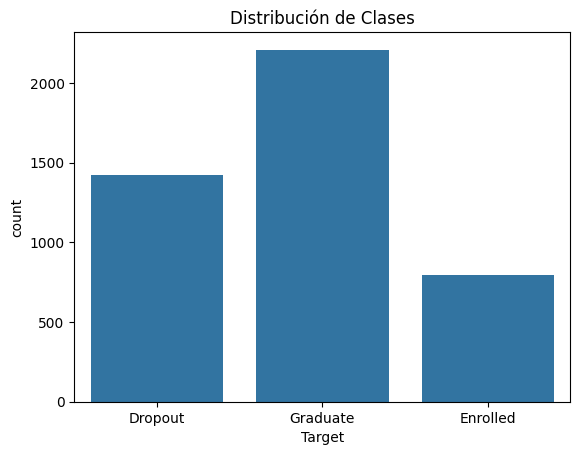

In [23]:
# Distribucion de clases
sns.countplot(x='Target', data=df)  #columna de clases
plt.title('Distribución de Clases')
plt.show()

In [6]:
X = df.drop(['Target'], axis=1)
y = df['Target']
Xtrain, x_test, ytrain, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
Xval, Xtest, yval, ytest = train_test_split(x_test, y_test, test_size=0.5, stratify=y_test)
print("La dimension del conjunto de entrenamiento es: ",Xtrain.shape)
print("La dimension del conjunto de validacion es: ",Xval.shape)
print("La dimension del conjunto de prueba es: ",Xtest.shape)

La dimension del conjunto de entrenamiento es:  (3096, 36)
La dimension del conjunto de validacion es:  (664, 36)
La dimension del conjunto de prueba es:  (664, 36)


f:\Maestria\MLOps\Proyecto\MLOps_Project\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.draw()
f:\Maestria\MLOps\Proyecto\MLOps_Project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


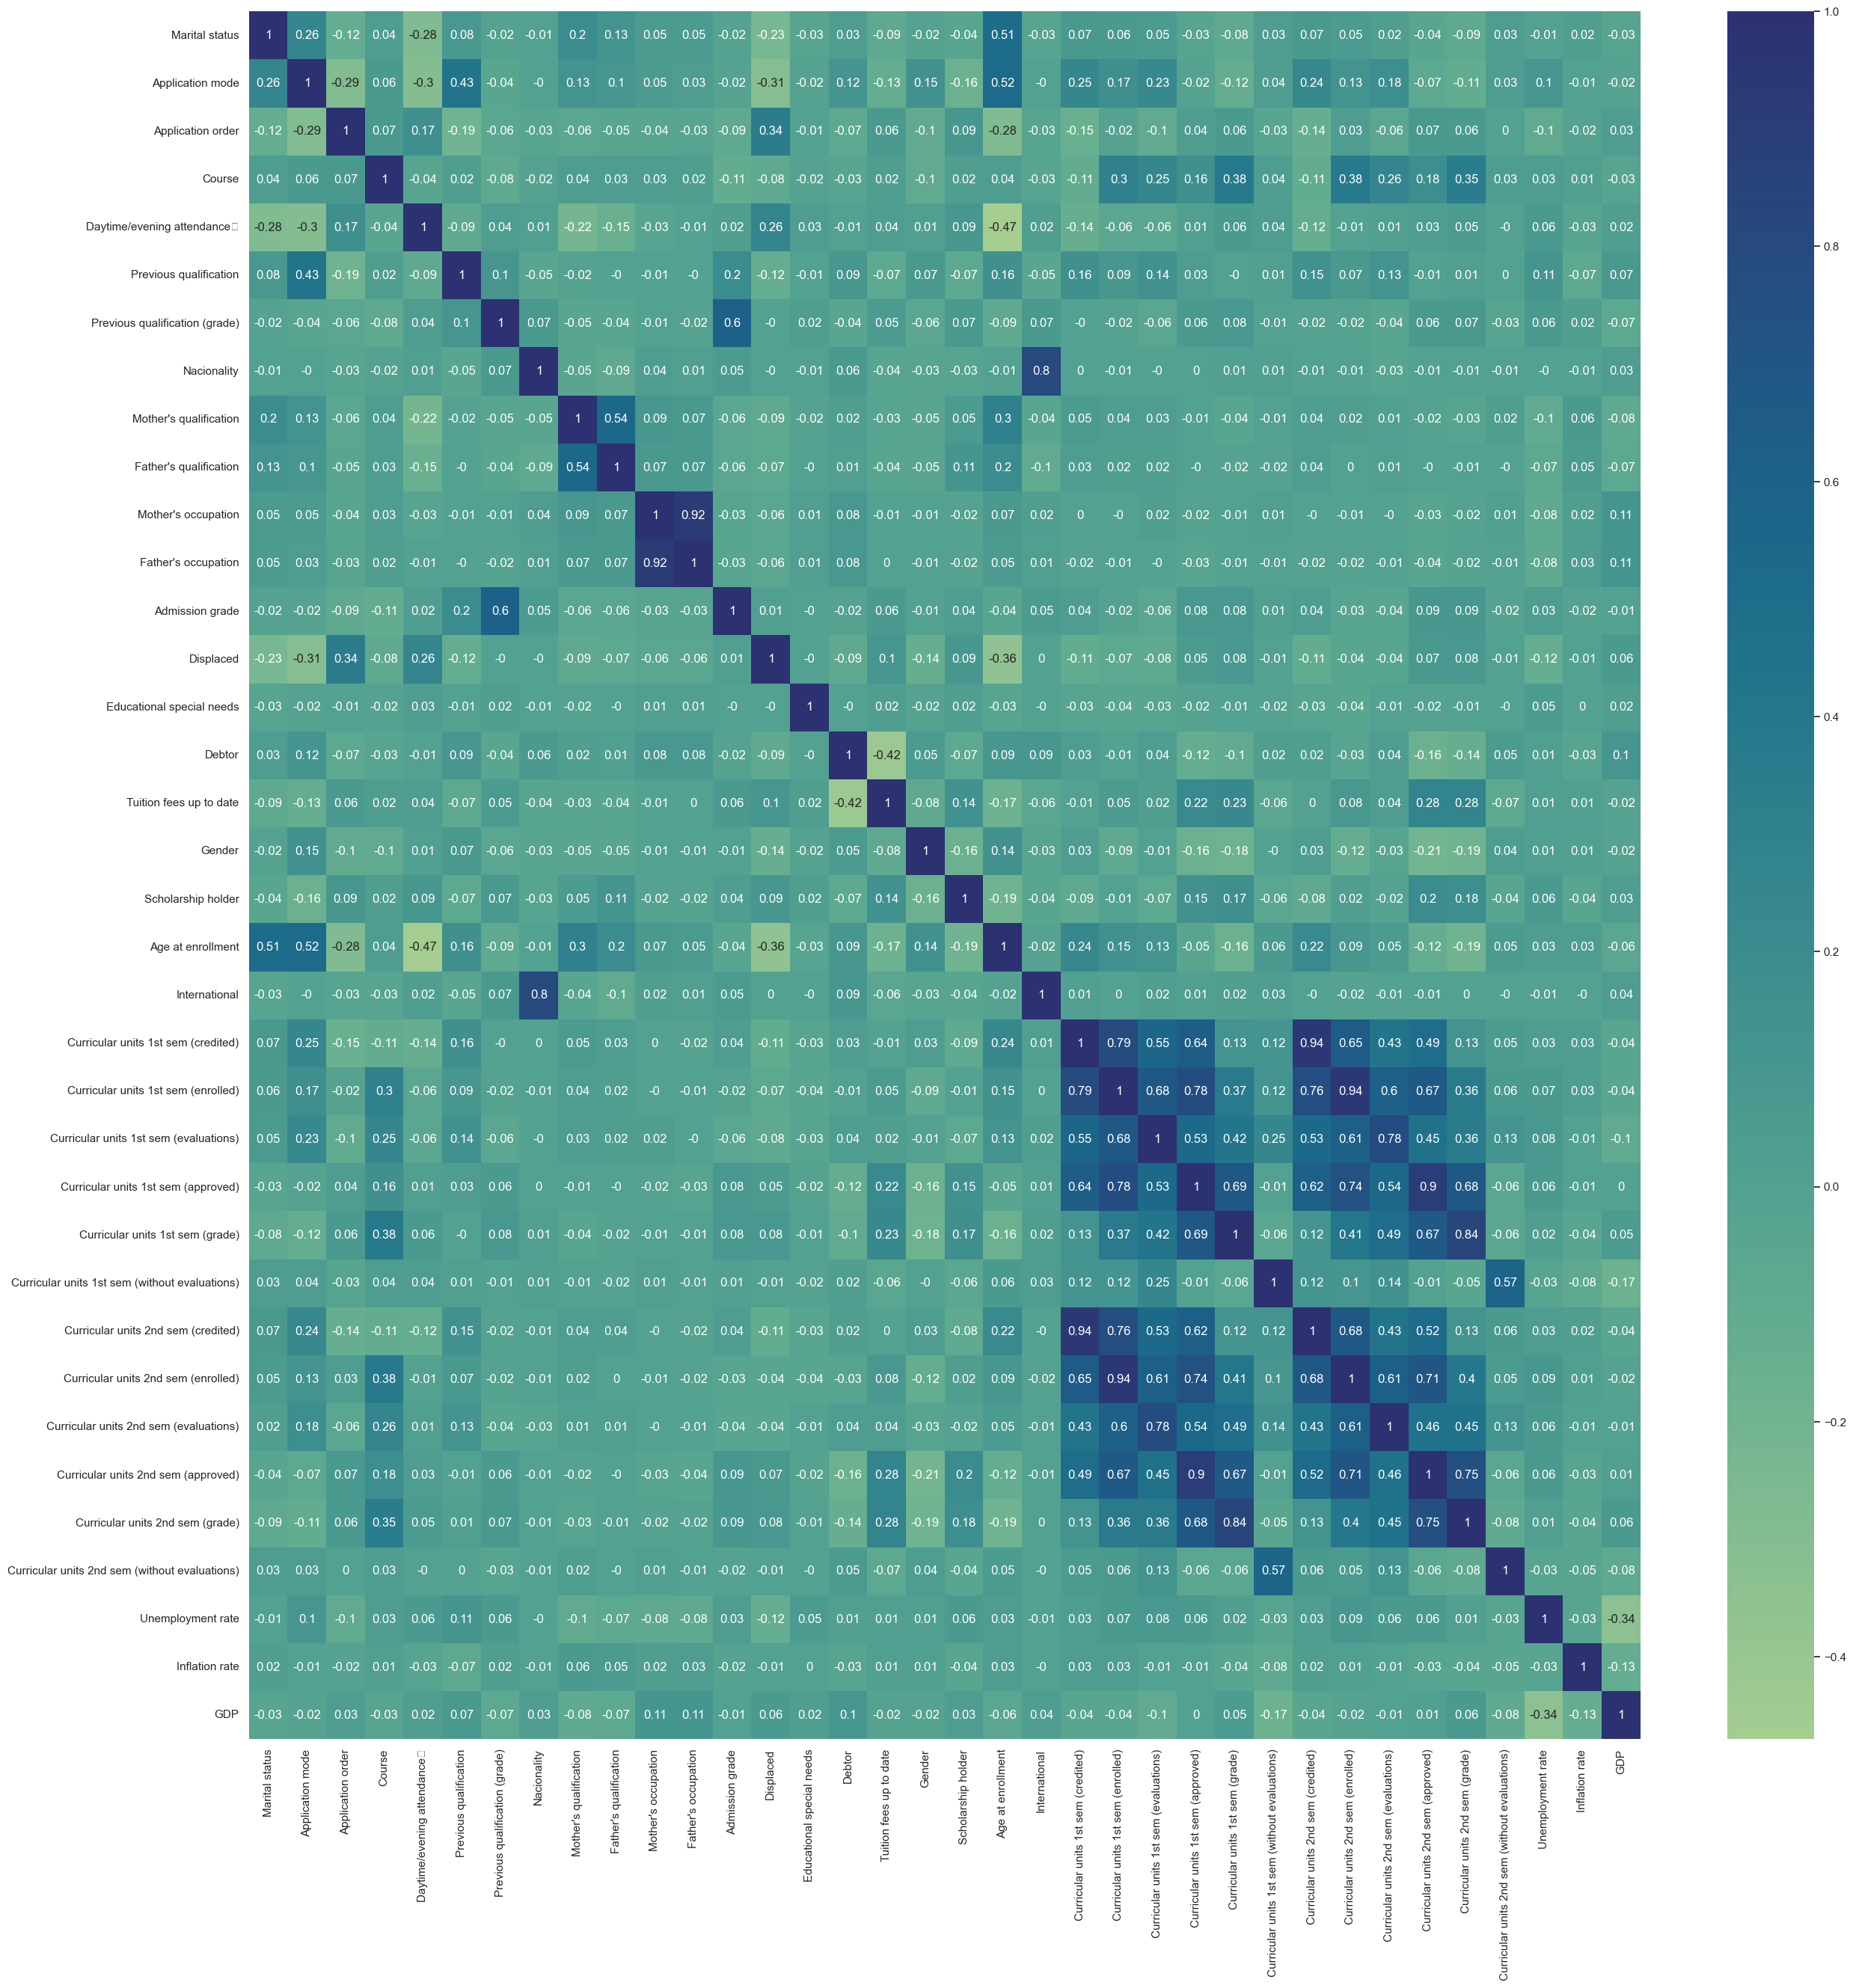

In [7]:
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(round(Xtrain.corr(numeric_only=True),2), annot=True,cmap="crest")
plt.show()

f:\Maestria\MLOps\Proyecto\MLOps_Project\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
f:\Maestria\MLOps\Proyecto\MLOps_Project\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
f:\Maestria\MLOps\Proyecto\MLOps_Project\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


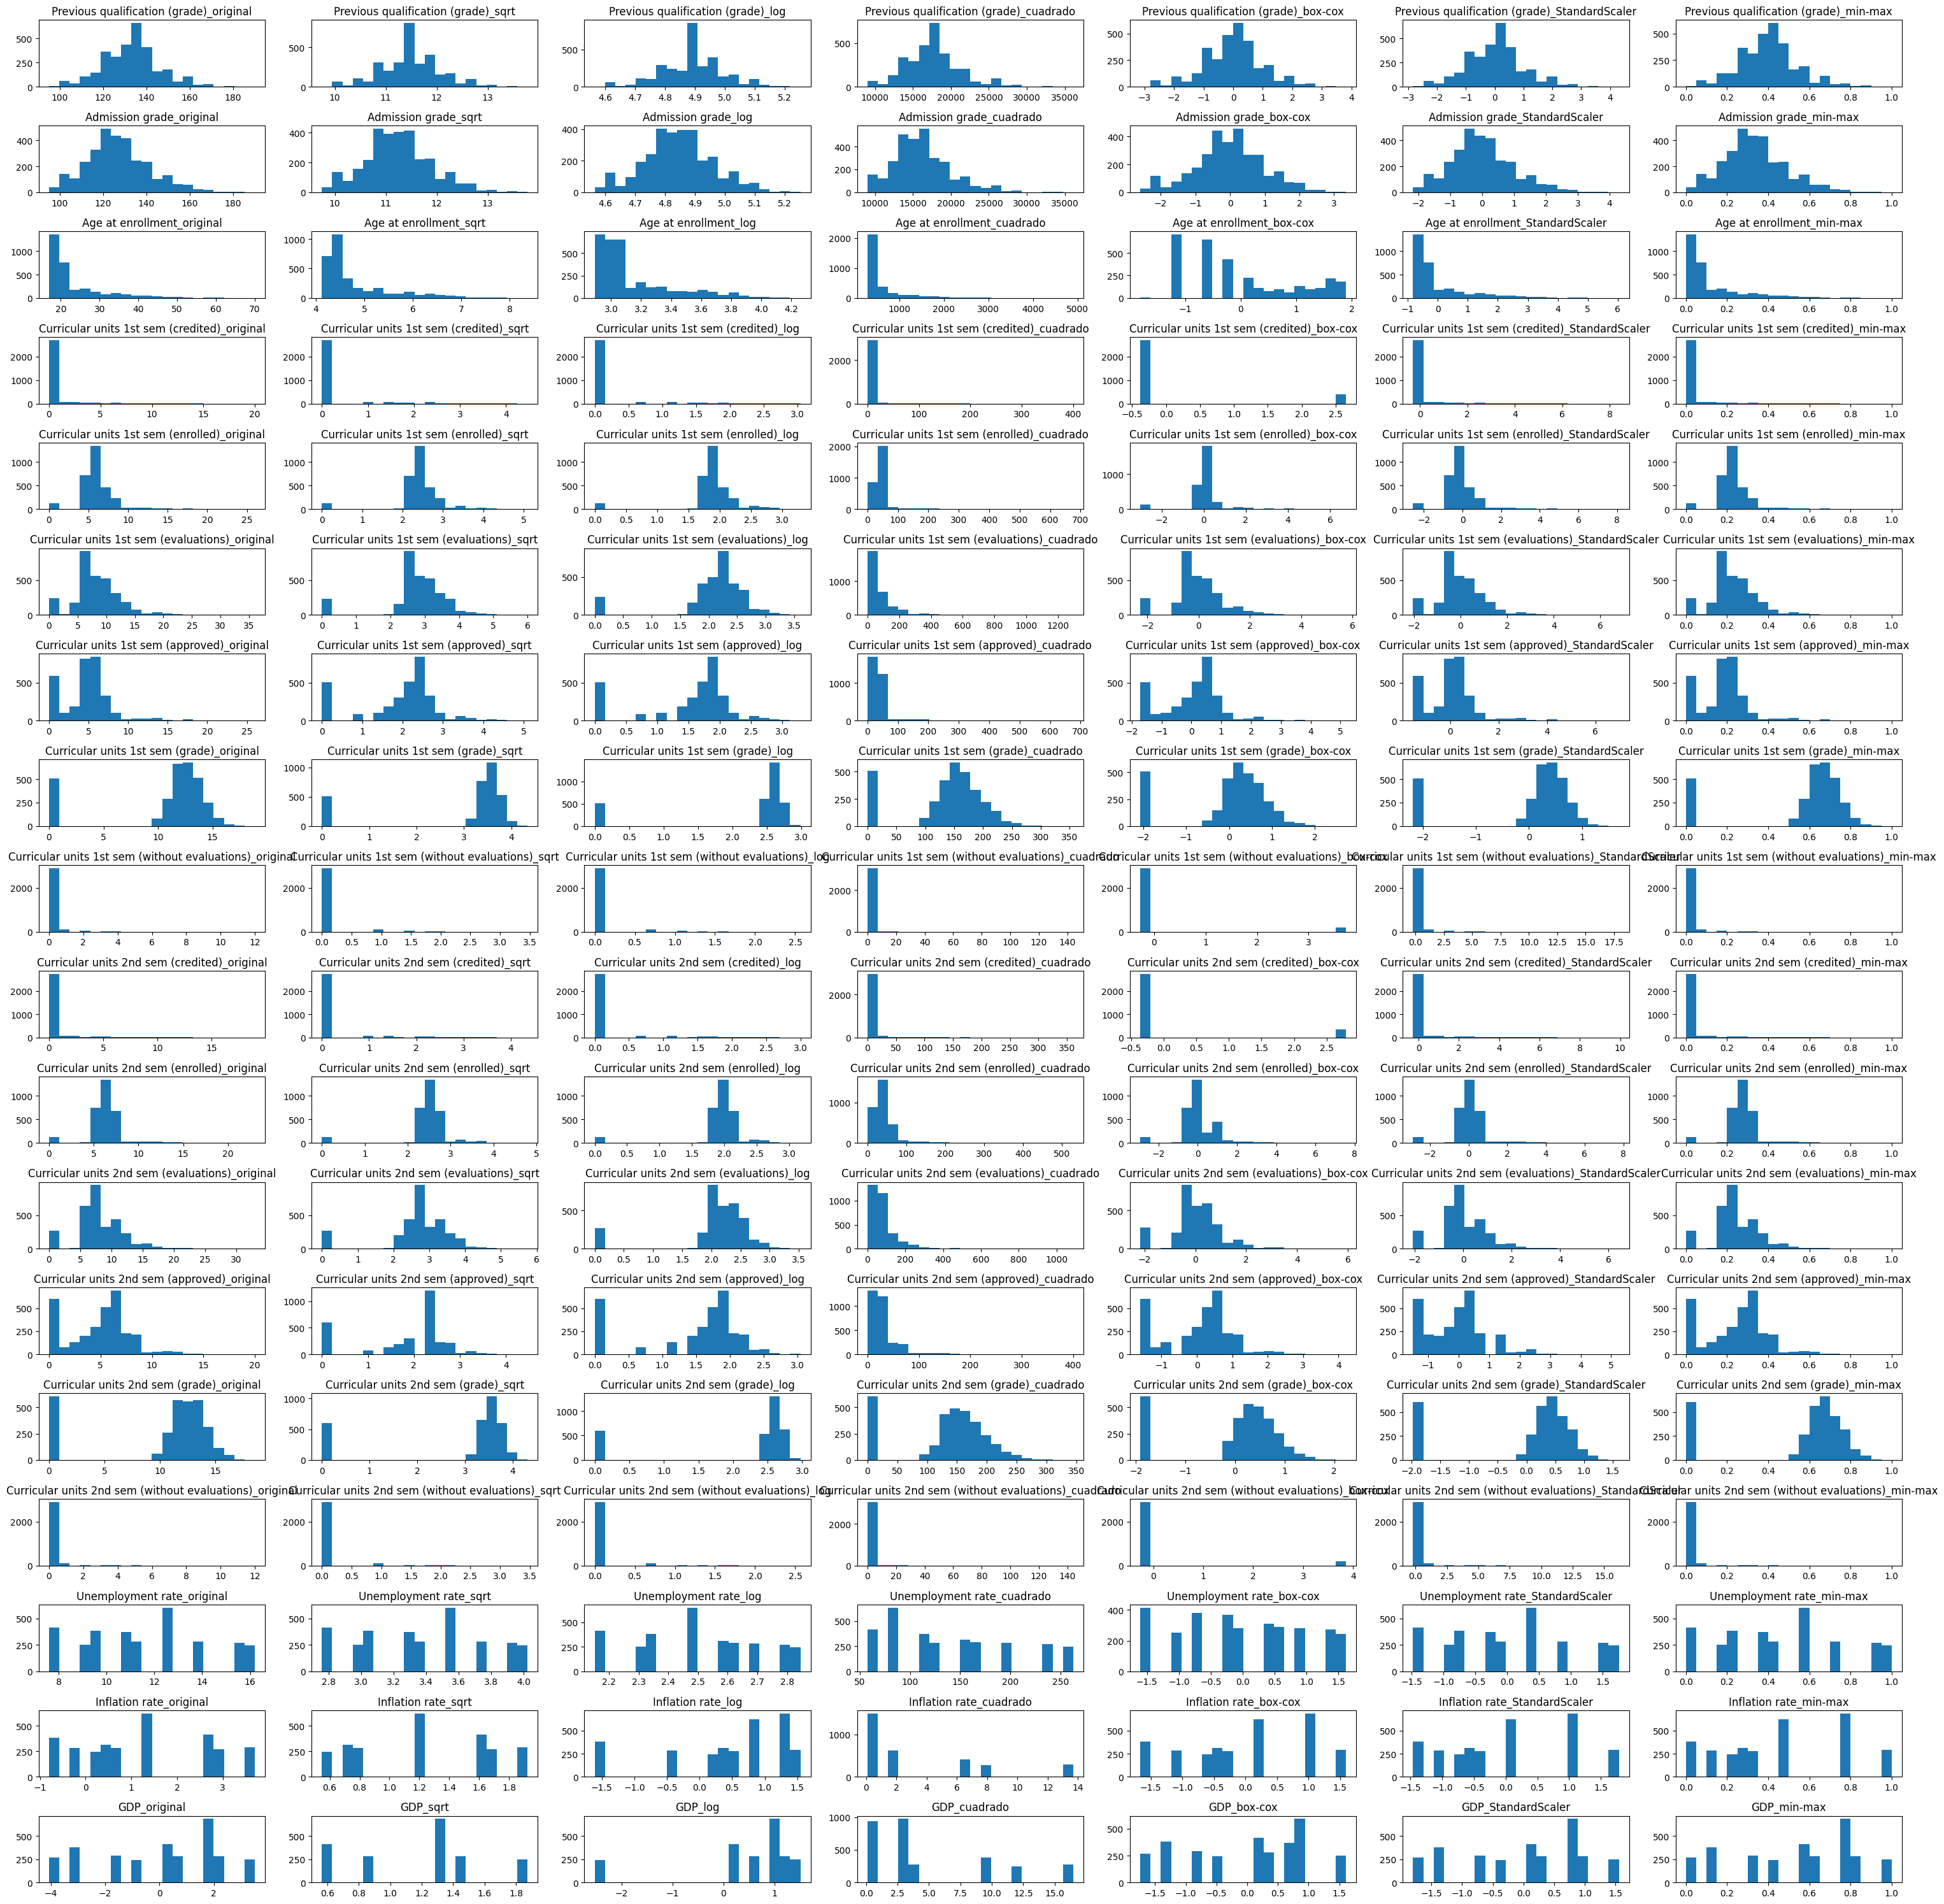

In [38]:
numericos = ['Previous qualification (grade)','Admission grade','Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
fig, axes = plt.subplots(len(numericos), 7, figsize=(30,30))

def histograma(data, bins, ax, variable):
  ax.set_title(variable)
  ax.hist(data, bins=bins)

for i in range(len(numericos)):
  histograma(Xtrain[numericos[i]],20,axes[i][0], numericos[i]+'_original')
  histograma(np.sqrt(Xtrain[numericos[i]]),20,axes[i][1], numericos[i]+'_sqrt')
  histograma(np.log1p(Xtrain[numericos[i]]),20,axes[i][2], numericos[i]+'_log')
  histograma(np.power(Xtrain[numericos[i]],2),20,axes[i][3], numericos[i]+'_cuadrado')
  data = Xtrain[numericos[i]]
  if min(data) < 1:
    data = Xtrain[numericos[i]] + (abs((min(Xtrain[numericos[i]]))) + 1)
  box = pd.DataFrame(power_transform(data.to_numpy().reshape(-1, 1),method='box-cox'),columns=[numericos[i]])
  histograma(box,20,axes[i][4], numericos[i]+'_box-cox')
  scaler = StandardScaler()
  standard = pd.DataFrame(scaler.fit_transform(Xtrain[numericos[i]].to_numpy().reshape(-1, 1)))
  histograma(standard,20,axes[i][5], numericos[i]+'_StandardScaler')
  scaler = MinMaxScaler()
  minmax = pd.DataFrame(scaler.fit_transform(Xtrain[numericos[i]].to_numpy().reshape(-1, 1)))
  histograma(minmax,20,axes[i][6], numericos[i]+'_min-max')

plt.tight_layout()
plt.show()


## Transformaciones a aplicar

Log: 'Previous qualification (grade)','Admission grade', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'

Standard Scaler: 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP'


# ***Ingeniería de Características***

In [7]:
# Log Transformer:
log_pipe = Pipeline([('Log', FunctionTransformer(np.log1p, feature_names_out='one-to-one'))] )
log_pipe_nombres = ['Previous qualification (grade)','Admission grade', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']

# Standard Scaler
scaler_pipe = Pipeline([('scaler', StandardScaler())] )
scaler_pipe_nombres = ['Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']

# categóricas:
catOHE_pipeline = Pipeline( [('OneHot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))] )
catOHE_pipeline_nombres = list(set(Xtrain.columns.values) - set(log_pipe_nombres + scaler_pipe_nombres))

In [8]:
ct_numericas = ColumnTransformer( transformers=[
    ('log_transformer', log_pipe, log_pipe_nombres),
    ('standard_Scaler', scaler_pipe, scaler_pipe_nombres)
] )

ct_categoricas = ColumnTransformer( transformers=[
    ('cat', catOHE_pipeline, catOHE_pipeline_nombres)
] )

In [9]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************
print("Datos de Xtrain:", len(Xtrain))
print("Datos de Xval:", len(Xval))
Xtrainval = pd.concat([Xtrain, Xval], axis=0)
print("Datos de Xtrainval:", len(Xtrainval))
ytrainval = pd.concat([ytrain, yval], axis=0)
print("Datos de ytrain", len(ytrain))
print("Datos de yval", len(yval))
print("Datos de ytrainval:", len(ytrainval))
# *********** Aquí termina la sección de agregar código *************


# Veamos cuántas variables nuevas se introducen con las transformaciones One-Hot-Encoding:
Xtmp = Xtrainval.copy()
tmp = ct_numericas.fit_transform(Xtmp)
print("Dimensión de las variables de entrada ANTES de las transformaciones:", Xtmp.shape)
print("Dimensión de las variables de entrada DESPUÉS de las transformaciones:", tmp.shape)

Datos de Xtrain: 3096
Datos de Xval: 664
Datos de Xtrainval: 3760
Datos de ytrain 3096
Datos de yval 664
Datos de ytrainval: 3760
Dimensión de las variables de entrada ANTES de las transformaciones: (3760, 36)
Dimensión de las variables de entrada DESPUÉS de las transformaciones: (3760, 18)


In [10]:
# Aplicando PCA
pca = PCA()
x_projected = pca.fit_transform(tmp)
x_projected = pd.DataFrame(x_projected)
print('Valores propios: ', list(np.round(pca.explained_variance_, decimals = 8)))
print('Porcentaje de Varianza: ', pca.explained_variance_ratio_*100)
print('Varianza Acumulada: ', np.cumsum(pca.explained_variance_ratio_))
print('Valores propios: ')
print(pca.components_)

Valores propios:  [np.float64(3.59567832), np.float64(1.37679717), np.float64(1.15372001), np.float64(1.01276343), np.float64(0.64754026), np.float64(0.53794744), np.float64(0.43695391), np.float64(0.1935773), np.float64(0.16521977), np.float64(0.10817985), np.float64(0.06370966), np.float64(0.05262571), np.float64(0.03676442), np.float64(0.02254154), np.float64(0.01688457), np.float64(0.01437867), np.float64(0.0046399), np.float64(0.00349585)]
Porcentaje de Varianza:  [3.80760271e+01 1.45794373e+01 1.22171870e+01 1.07245433e+01
 6.85705399e+00 5.69653331e+00 4.62707379e+00 2.04986482e+00
 1.74957598e+00 1.14555826e+00 6.74646218e-01 5.57274012e-01
 3.89312658e-01 2.38701123e-01 1.78797250e-01 1.52261271e-01
 4.91337154e-02 3.70189286e-02]
Varianza Acumulada:  [0.38076027 0.52655464 0.64872651 0.75597195 0.82454249 0.88150782
 0.92777856 0.94827721 0.96577297 0.97722855 0.98397501 0.98954775
 0.99344088 0.99582789 0.99761586 0.99913847 0.99962981 1.        ]
Valores propios: 
[[ 3.5818

In [11]:
# Varianza por cada componente
total_components = tmp.shape[1]
for i in range(0, total_components):
  print("Porcentaje de Varianza por componente principal", i+1, "es", format(pca.explained_variance_ratio_[i]*100,'.0f'),'%')

Porcentaje de Varianza por componente principal 1 es 38 %
Porcentaje de Varianza por componente principal 2 es 15 %
Porcentaje de Varianza por componente principal 3 es 12 %
Porcentaje de Varianza por componente principal 4 es 11 %
Porcentaje de Varianza por componente principal 5 es 7 %
Porcentaje de Varianza por componente principal 6 es 6 %
Porcentaje de Varianza por componente principal 7 es 5 %
Porcentaje de Varianza por componente principal 8 es 2 %
Porcentaje de Varianza por componente principal 9 es 2 %
Porcentaje de Varianza por componente principal 10 es 1 %
Porcentaje de Varianza por componente principal 11 es 1 %
Porcentaje de Varianza por componente principal 12 es 1 %
Porcentaje de Varianza por componente principal 13 es 0 %
Porcentaje de Varianza por componente principal 14 es 0 %
Porcentaje de Varianza por componente principal 15 es 0 %
Porcentaje de Varianza por componente principal 16 es 0 %
Porcentaje de Varianza por componente principal 17 es 0 %
Porcentaje de Varia

In [12]:
# Varianza acumulada
print('Varianza Acumulada: ', np.cumsum(pca.explained_variance_ratio_))

Varianza Acumulada:  [0.38076027 0.52655464 0.64872651 0.75597195 0.82454249 0.88150782
 0.92777856 0.94827721 0.96577297 0.97722855 0.98397501 0.98954775
 0.99344088 0.99582789 0.99761586 0.99913847 0.99962981 1.        ]


In [13]:
va = np.cumsum(pca.explained_variance_ratio_)
for i in range(len(va)):
    if va[i] > 0.9:
        print(f'El número de componentes que explican el 90% de la varianza son: {i+1}')
        break

El número de componentes que explican el 90% de la varianza son: 7


In [14]:
# Influencia de las variables para los 7 componentes a utilizar
num_components = 7
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = log_pipe_nombres + scaler_pipe_nombres , index=['Componente principal {}'.format(i) for i in range(1, num_components + 1)])
pc_df

,Previous qualification (grade),Admission grade,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Age at enrollment,Unemployment rate,Inflation rate,GDP
Componente principal 1,0.000358,0.000986,0.105820,0.158235,0.268510,0.375979,0.467069,0.002010,0.094074,0.152229,0.292022,0.386468,0.508025,0.003222,0.076964,0.006953,0.018775,0.032638
Componente principal 2,0.001460,0.000405,0.105660,0.059070,0.090308,0.011398,0.022682,0.026899,0.093651,0.052591,0.064592,0.008680,0.052262,0.023087,0.301857,0.619782,0.173916,0.671772
Componente principal 3,0.011946,0.006703,0.302401,0.137925,0.153223,0.012245,0.080347,0.030631,0.264953,0.114181,0.119693,0.049057,0.109773,0.031638,0.771206,0.311204,0.054605,0.225192
Componente principal 4,0.002652,0.001774,0.036165,0.001222,0.010574,0.006483,0.025627,0.016325,0.033119,0.002173,0.008217,0.002779,0.019201,0.011854,0.119379,0.272480,0.949621,0.075106
Componente principal 5,0.001236,0.002207,0.055712,0.001548,0.092053,0.034557,0.023297,0.098753,0.049006,0.009745,0.055601,0.030848,0.009643,0.056894,0.039859,0.659090,0.248738,0.684979
Componente principal 6,0.009523,0.009645,0.588599,0.127386,0.015571,0.061618,0.214515,0.048620,0.523245,0.095818,0.023080,0.024930,0.223436,0.024900,0.497923,0.021018,0.019827,0.035984
Componente principal 7,0.014216,0.031187,0.187918,0.227566,0.518740,0.170952,0.005124,0.077636,0.168250,0.233451,0.508066,0.321281,0.308266,0.093305,0.204417,0.070984,0.011586,0.111823


In [15]:
Xtrainval = pd.concat([Xtrain, Xval], axis=0)
onehot = ct_categoricas.fit_transform(Xtrainval)
onehot_columns = ct_categoricas.named_transformers_['cat'].get_feature_names_out()
onehot_df = pd.DataFrame(onehot, columns=onehot_columns)
onehot_df


,Educational special needs_1,Displaced_1,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,...,Father's qualification_34,Father's qualification_35,Father's qualification_36,Father's qualification_37,Father's qualification_38,Father's qualification_39,Father's qualification_40,Father's qualification_41,Father's qualification_42,Father's qualification_43
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3756,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3758,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
componentes = x_projected.iloc[:,0:7]
componentes.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
ytrainval.reset_index(drop=True, inplace=True)
# Uniendo los dataframes
resultado = pd.concat([componentes,onehot_df,ytrainval], axis=1)
resultado

,0,1,2,3,4,5,6,Educational special needs_1,Displaced_1,Course_171,...,Father's qualification_35,Father's qualification_36,Father's qualification_37,Father's qualification_38,Father's qualification_39,Father's qualification_40,Father's qualification_41,Father's qualification_42,Father's qualification_43,Target
0,-1.922155,-0.135926,2.525709,-0.800589,0.388490,-1.287938,0.979895,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Dropout
1,1.240791,0.118381,-0.978727,-1.190373,0.510019,-0.048157,0.015829,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Graduate
2,2.801626,-0.304215,1.799037,-0.804742,0.857056,3.028113,-0.327872,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Graduate
3,1.176853,0.614274,-0.549213,-0.537345,0.589370,-0.097291,0.080490,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Graduate
4,0.186671,0.928248,0.285096,1.385048,-0.758256,-0.341443,0.248882,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,0.593680,1.105787,-0.627623,-0.322559,0.372274,-0.121312,-0.262554,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Graduate
3756,-4.944245,1.362694,-0.884522,-0.436046,0.601511,0.430866,-1.387021,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dropout
3757,-2.042947,0.747495,0.805863,1.296548,-0.683386,-0.042455,0.948493,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dropout
3758,0.966876,0.129032,-0.969633,-1.202007,0.523723,-0.183885,-0.202147,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Graduate


### Conjunto de entrenamiento - validación final

In [22]:
Xtraining = resultado.drop(['Target'], axis=1)
Xtraining.columns = Xtraining.columns.astype(str)
ytraining = resultado['Target']

In [38]:
set(ytraining)

{'Dropout', 'Enrolled', 'Graduate'}

# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

In [51]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
def mis_modelos():
  modelos, nombres = list(), list()

  modelos.append(LogisticRegression(solver='newton-cg',max_iter=1000, C=1))
  ombres.append('LR')

  modelos.append(KNeighborsClassifier(n_neighbors=21))
  nombres.append('kNN')

  modelos.append(DecisionTreeClassifier(criterion='entropy',min_samples_split=3, max_depth=20,max_leaf_nodes=4))
  nombres.append('DTree')

  modelos.append(RandomForestClassifier(n_estimators=100,min_samples_split=8, max_depth=4,n_jobs=-1,criterion='entropy'))
  nombres.append('RF')

  modelos.append(MLPClassifier( hidden_layer_sizes=(20,20),max_iter=10000,alpha=0.0005,solver='sgd',learning_rate_init=0.001))
  nombres.append('MLP')

  modelos.append(SVC(C=5, gamma=0.05))
  nombres.append('SVM')


  return modelos, nombres


modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=3,
                                 n_repeats=15,
                                 random_state=5     # agreguemos una semilla para estabilizar resultados.
                                 )


  # Definimos las métricas que desamos recuperar:
  mismetricas = ['accuracy','precision_macro','recall_macro','f1_macro']

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtraining,
                          np.ravel(ytraining),
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          error_score = 0
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> SVM
	 test_accuracy 0.762 (0.009)
	 train_accuracy 0.936 (0.003)
	 test_precision_macro 0.707 (0.014)
	 train_precision_macro 0.942 (0.003)
	 test_recall_macro 0.680 (0.012)
	 train_recall_macro 0.908 (0.005)
	 test_f1_macro 0.688 (0.013)
	 train_f1_macro 0.923 (0.004)
